In [1]:
execution_mode = 'restricted'

# Support Vector Classifier Model

After the Ensemble model family, a Support Vector Classifier shall be calculated in this chapter. The Support Vector Classifier will be modelled in two modes. The first mode will be without cross-validation, while the second mode will be with cross-validation. The structure of this chapter will be the same to the structure drawn in the preceding chapter.

## Table of Contents

- [Data Takeover](#Data-Takeover)
- [Support Vector Classifier](#Support-Vector-Classifier)
    - [Train/Test Split for Support Vector Classifier](#Train/Test-Split-for-Support-Vector-Classifier)
    - [Model Training for Support Vector Classifier](#Model-Training-for-Support-Vector-Classifier)
    - [Performance Measurement for Support Vector Classifier](#Performance-Measurement-for-Support-Vector-Classifier)
    - [Model Interpretation](#Model-Interpretation)
- [Support Vector Classifier with Cross-Validation](#Support-Vector-Classifier-with-Cross-Validation)
    - [Train/Test Split for Support Vector Classifier CV](#Train/Test-Split-for-Support-Vector-Classifier-CV)
    - [Model Training for Support Vector Classifier CV](#Model-Training-for-Support-Vector-Classifier-CV)
    - [Performance Measurement of Support Vector Classifier CV](#Performance-Measurement-of-Support-Vector-Classifier-CV)
- [Summary](#Summary)
    - [Results Handover](#Results-Handover)

## Data Takeover

The data from chapters [Feature Matrix Generation](./4_FeatureMatrixGeneration.ipynb) and [Features Discussion and Dummy Classifier Baseline](./5_FeatureDiscussionDummyBaseline.ipynb) have to be read in as input for processing in this chapter.

In [2]:
import os
import pandas as pd
import bz2
import _pickle as cPickle

path_goldstandard = './daten_goldstandard'

# Restore results so far
df_labelled_feature_matrix = pd.read_pickle(os.path.join(path_goldstandard,
                                                         'labelled_feature_matrix.pkl'),
                                 compression=None)

# Restore DataFrame with features from compressed pickle file
with bz2.BZ2File((os.path.join(
    path_goldstandard, 'labelled_feature_matrix_full.pkl')), 'rb') as file:
    df_attribute_with_sim_feature = cPickle.load(file)

df_labelled_feature_matrix.head()

,coordinate_E_delta,coordinate_N_delta,corporate_full_delta,doi_delta,edition_delta,exactDate_delta,format_prefix_delta,format_postfix_delta,isbn_delta,ismn_delta,...,part_delta,person_100_delta,person_700_delta,person_245c_delta,pubinit_delta,scale_delta,ttlfull_245_delta,ttlfull_246_delta,volumes_delta,duplicates
0,-1.0,-1.0,-1.0,-1.0,-1.0,0.75,1.0,1.0,1.0,-1.0,...,1.0,1.0,1.0,1.000000,1.000000,-1.0,1.000000,-1.0,1.0,1
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.75,1.0,1.0,1.0,-1.0,...,1.0,1.0,-0.5,0.818905,0.848485,-1.0,0.787879,-1.0,1.0,1
2,-1.0,-1.0,-1.0,-1.0,-1.0,0.75,1.0,1.0,1.0,-1.0,...,1.0,1.0,-0.5,0.697740,0.848485,-1.0,1.000000,-1.0,1.0,1
3,-1.0,-1.0,-1.0,-1.0,-1.0,0.75,1.0,1.0,1.0,-1.0,...,1.0,1.0,-0.5,0.818905,0.848485,-1.0,0.787879,-1.0,1.0,1
4,-1.0,-1.0,-1.0,-1.0,-1.0,0.75,1.0,1.0,1.0,-1.0,...,1.0,1.0,-1.0,1.000000,1.000000,-1.0,1.000000,-1.0,1.0,1


In [3]:
print('Part of duplicates (1) on uniques (0) in units of [%]')
print(round(df_labelled_feature_matrix.duplicates.value_counts(normalize=True)*100, 2))

Part of duplicates (1) on uniques (0) in units of [%]
0    99.43
1     0.57
Name: duplicates, dtype: float64


## Support Vector Classifier

A Support Vector Machine allows the use of regularization. To get an idea on its basic behaiour, a first model with grid search but without cross-validation will be calculated.

### Train/Test Split for Support Vector Classifier

All three data sets like for training, validation and testing have to be generated by splitting the raw data.

In [4]:
import classifier_fitting_funcs as cff

X_tr, X_val, X_te, y_tr, y_val, y_te, idx_tr, idx_val, idx_te = cff.split_feature_target(
    df_labelled_feature_matrix, 'train_validation_test')

X_tr[:5], y_tr[:5], idx_tr[:5]

(array([[-1.        , -1.        , -1.        , -0.5       , -1.        ,
          0.625     ,  0.        ,  0.42857143,  1.        , -1.        ,
         -0.5       , -0.5       ,  0.49267677, -0.5       ,  0.54033531,
         -0.5       , -1.        ,  0.57608486, -1.        , -0.5       ],
        [-1.        , -1.        , -1.        , -1.        , -0.5       ,
          0.5       ,  0.        ,  0.42857143,  0.        , -1.        ,
         -1.        ,  0.        , -0.5       , -0.5       ,  0.50978836,
         -0.5       , -1.        ,  0.56688312, -1.        ,  0.51111111],
        [-0.5       , -0.5       ,  0.06      , -1.        , -1.        ,
          0.5       ,  0.        ,  0.42857143,  0.        , -1.        ,
         -1.        , -0.5       , -1.        , -1.        , -0.5       ,
         -0.5       , -0.5       ,  0.46245348, -0.5       , -0.5       ],
        [-1.        , -1.        , -0.5       , -1.        , -1.        ,
          0.625     ,  0.        , 

In [5]:
print(X_tr.shape, y_tr.shape, X_val.shape, y_val.shape, X_te.shape, y_te.shape)

(166033, 20) (166033,) (41509, 20) (41509,) (51886, 20) (51886,)


### Model Training for Support Vector Classifier

The parameter space for grid search is specific for Support Vector Classifiers.

In [6]:
if execution_mode == 'full' :
    # Kernel 'rbf' has long calculation times, but does not generate
    #  the best accuracy : Ommit in grid search.
    parameter_dictionary = {
        'kernel' : ['linear', 'poly'],
        'degree' : [2, 3, 4],
        'gamma' : [1.5, 2, 2.5, 'auto'],
        'C' : [0.5, 0.8, 1.0],
        'class_weight' : [None, 'balanced']
    }
elif execution_mode == 'tune' :
    parameter_dictionary = {
        'kernel' : ['poly'],
        'degree' : [3],
        'gamma' : [1.5],
        'C' : [0.5],
        'class_weight' : [None]
    }
elif execution_mode == 'restricted' :
    parameter_dictionary = {
        'kernel' : ['poly'],
        'degree' : [3],
        'gamma' : [2.0],
        'C' : [0.5],
        'class_weight' : [None]
    }

# Grid of values
grid = cff.generate_parameter_grid(parameter_dictionary)

The grid parameters are ...
kernel ['poly']
degree [3]
gamma [2.0]
C [0.5]
class_weight [None]
 => Number of combinations : 1


The classifiers are fitted on each point of the grid.

In [7]:
from sklearn.svm import SVC

sv = SVC(random_state=0)

# Save accuracy on test set
test_scores = []
for params_dict in grid :
    test_scores.append(cff.fit_model_measure_scores(sv, params_dict, X_tr, y_tr, X_val, y_val))

# Save measured accuracies
df_test_scores_sv = pd.DataFrame(test_scores).sort_values('accuracy_val', ascending=False)

Fitting with parameters {'C': 0.5, 'class_weight': None, 'degree': 3, 'gamma': 2.0, 'kernel': 'poly'}
 => validation score 99.904%


The parameters for the best estimator of Support Vector Classifier without cross-validation are shown below.

In [8]:
best_params = cff.get_best_parameters(test_scores, parameter_dictionary)

# Create a decision tree
sv_best = SVC(gamma=best_params['gamma'], kernel=best_params['kernel'],
              C=best_params['C'], class_weight=best_params['class_weight'],
              degree=best_params['degree'], random_state=0
             )

# Fit estimator
sv_best.fit(X_tr, y_tr)

The parameters for the best model are ...
kernel = poly
degree = 3
gamma = 2.0
C = 0.5
class_weight = None


SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2.0, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Performance Measurement for Support Vector Classifier

The performance measurement of the best estimator is done as described in chapter [Decision Tree Model](./6_DecisionTreeModel.ipynb) and is shown without any further comment.

In [9]:
from sklearn.metrics import confusion_matrix

y_pred_sv = sv_best.predict(X_te)

confusion_matrix(y_te, y_pred_sv)

array([[51557,    34],
       [   26,   269]])

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

print('Score {:.3f}%'.format(100*sv_best.score(X_te, y_te)))
print('Area under the curve {:.3f}% - accuracy {:.3f}% - precision {:.3f}% - recall {:.3f}%'.format(100*roc_auc_score(y_te, y_pred_sv),
                100*accuracy_score(y_te, y_pred_sv),
                100*precision_score(y_te, y_pred_sv),
                100*recall_score(y_te, y_pred_sv)
               ))

Score 99.884%
Area under the curve 95.560% - accuracy 99.884% - precision 88.779% - recall 91.186%


The wrongly classified records of this classifier have to be persisted for assessment in chapter [Overview and Summary](./0_OverviewSummary.ipynb).

In [11]:
import results_analysis_funcs as raf
import results_saving_funcs as rsf

idx = {}
idx['true_predicted_uniques'], idx['true_predicted_duplicates'], idx['false_predicted_uniques'], idx['false_predicted_duplicates'] = raf.get_confusion_matrix_indices(y_te, y_pred_sv)

wrong_prediction_groups = ['false_predicted_uniques', 'false_predicted_duplicates']

for i in wrong_prediction_groups :
    rsf.add_wrong_predictions(path_goldstandard, 
                              sv_best, i, df_attribute_with_sim_feature.iloc[idx_te].iloc[idx[i]])

### Model Interpretation

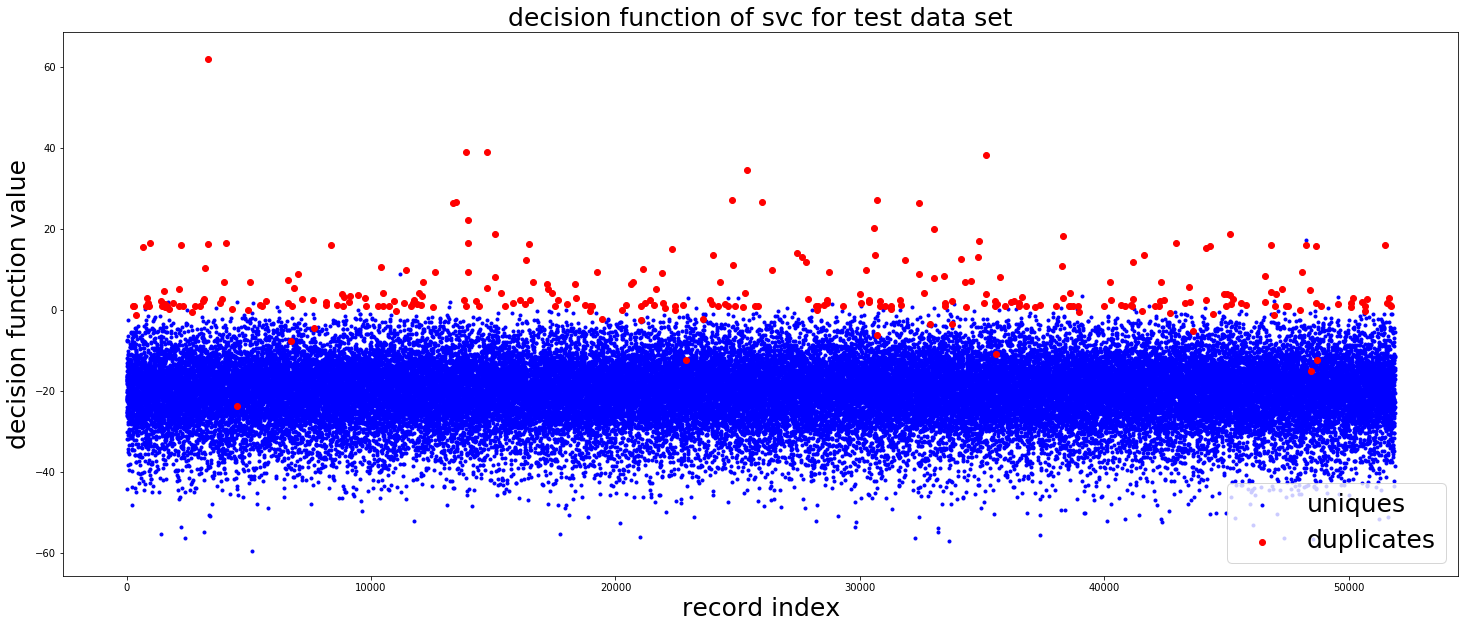

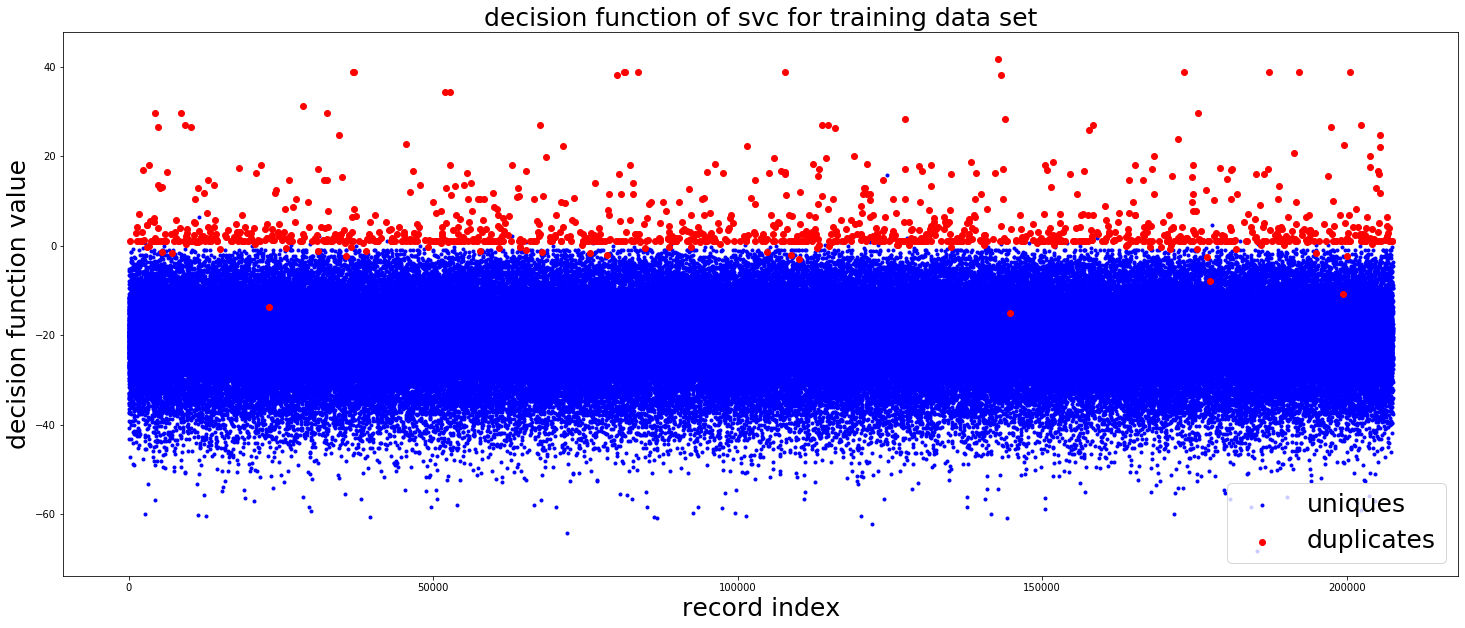

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_decision_function(X, y, title):
    index = np.arange(len(y))
    classes = ['uniques', 'duplicates']
    classes_indexes = [y==0, y==1]
    marker_size = ['.', 'o']
    colors = ['blue', 'red']
    font_size = 25

    plt.subplots(figsize=(25, 10))
    for c in range(len(classes)) :
        plt.scatter(index[classes_indexes[c]],
                    sv_best.decision_function(X[classes_indexes[c]]),
                    marker=marker_size[c], color=colors[c], label=classes[c])
    plt.xlabel('record index', fontsize=font_size)
    plt.ylabel('decision function value', fontsize=font_size)
    plt.title(title, fontsize=font_size)
    plt.legend(fontsize=font_size, loc='lower right')
    plt.show()

plot_decision_function(X_te, y_te, 'decision function of svc for test data set')
plot_decision_function(X_tr, y_tr, 'decision function of svc for training data set')

## Support Vector Classifier with Cross-Validation

Another Support Vector Classifier shall be fitted, now with the use of cross-validation in order to harden the result of the first model statistically.

### Train/Test Split for Support Vector CV

Cross-validation with object $\texttt{GridSearchCV}$ from scikit-learn splits the training data into training and validation parts. It is sufficient to split the original data into a train and a test data set without any additional splitting of the training data.

In [12]:
X_tr, _, X_te, y_tr, _, y_te, idx_tr, _, idx_te = cff.split_feature_target(
    df_labelled_feature_matrix, 'train_test')

X_tr[:5], y_tr[:5], idx_tr[:5]

(array([[-1.        , -1.        , -0.5       , -1.        , -1.        ,
          0.25      ,  0.        ,  0.42857143,  0.        , -1.        ,
          0.16666667, -1.        , -0.5       , -0.5       ,  0.53888889,
          0.47991021, -1.        ,  0.59978811, -1.        ,  0.78333333],
        [-1.        , -1.        , -1.        , -1.        , -1.        ,
          0.4375    ,  0.        ,  0.11111111,  1.        , -1.        ,
         -0.5       , -1.        ,  1.        ,  0.57605284,  0.59184563,
          0.41919192, -1.        ,  0.7332472 , -1.        ,  0.        ],
        [-1.        , -1.        ,  0.05      , -1.        , -1.        ,
          0.25      ,  1.        ,  1.        ,  1.        , -1.        ,
         -1.        , -1.        , -0.5       ,  0.52608873,  0.61453149,
          0.41568627, -1.        ,  0.51855227, -1.        ,  0.        ],
        [-1.        , -1.        , -1.        , -1.        , -1.        ,
          0.5       ,  1.        , 

In [13]:
print(X_tr.shape, y_tr.shape, X_te.shape, y_te.shape)

(207542, 20) (207542,) (51886, 20) (51886,)


### Model Training for Support Vector CV

The parameter grid remains the same as with the model above.

In [14]:
from sklearn.model_selection import GridSearchCV
import numpy as np

# Create cross-validation object with DecisionTreeClassifer
grid_cv = GridSearchCV(SVC(random_state=0),
                       param_grid = parameter_dictionary, cv=5
                       , verbose=1
                      )

# Fit estimator
grid_cv.fit(X_tr, y_tr)

# Get the results with 'cv_results_', get parameters with their scores
params = pd.DataFrame(grid_cv.cv_results_['params'])
scores = pd.DataFrame(grid_cv.cv_results_['mean_test_score'], columns=['accuracy_val'])
log_scores = pd.DataFrame(np.log(1-grid_cv.cv_results_['mean_test_score']), columns=['log_accuracy_val'])
scores_std = pd.DataFrame(grid_cv.cv_results_['std_test_score'], columns=['std_accuracy_val'])

# Create a DataFrame of (parameters, score, std) pairs
df_test_scores_svcv = params.merge(scores, how='inner', left_index=True, right_index=True)
df_test_scores_svcv = df_test_scores_svcv.merge(
    scores_std, how='inner', left_index=True, right_index=True).sort_values(
    'accuracy_val', ascending=False)
df_test_scores_svcv = df_test_scores_svcv.merge(
    log_scores, how='inner', left_index=True, right_index=True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.7min finished


In [15]:
df_test_scores_svcv

,C,class_weight,degree,gamma,kernel,accuracy_val,std_accuracy_val,log_accuracy_val
0,0.5,None,3,2.0,poly,0.99894,0.000216,-6.849461


The best estimator is shown below.

In [16]:
svcv_best = grid_cv.best_estimator_
svcv_best

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=2.0, kernel='poly',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

### Performance Measurement of Support Vector Classifier CV

The structure of this subsection has been described previously and remains the same like for all models.

In [17]:
y_pred_svcv = svcv_best.predict(X_te)

confusion_matrix(y_te, y_pred_svcv)

array([[51560,    31],
       [   18,   277]])

In [18]:
print('Score {:.3f}%'.format(100*svcv_best.score(X_te, y_te)))
print('Area under the curve {:.3f}% - accuracy {:.3f}% - precision {:.3f}% - recall {:.3f}%'.format(
    100*roc_auc_score(y_te, y_pred_svcv),
                100*accuracy_score(y_te, y_pred_svcv),
                100*precision_score(y_te, y_pred_svcv),
                100*recall_score(y_te, y_pred_svcv)
               ))

Score 99.906%
Area under the curve 96.919% - accuracy 99.906% - precision 89.935% - recall 93.898%


For results comparison, the wrongly classified records need to be persisted.

In [19]:
idx = {}
idx['true_predicted_uniques'], idx['true_predicted_duplicates'], idx['false_predicted_uniques'], idx['false_predicted_duplicates'] = raf.get_confusion_matrix_indices(y_te, y_pred_svcv)

wrong_prediction_groups = ['false_predicted_uniques', 'false_predicted_duplicates']

for i in wrong_prediction_groups :
    rsf.add_wrong_predictions(path_goldstandard, 
                              svcv_best, i, df_attribute_with_sim_feature.iloc[idx_te].iloc[idx[i]], '_CV')

## Summary

This chapter shows the modelling and the performance of Support Vector Classifiers with regularization. The final comparison of the results of this chapter with the results of all other models will be done in [Overview and Summary](./0_OverviewSummary.ipynb).

### Results Handover

For a consolidated view of all results, the performance of both Support Vector Classifiers of this chapter have to be stored.

In [ ]:
path_results = './results'

rsf.add_result_to_results(path_results,
                          df_test_scores_sv, sv_best, X_te, y_te, y_pred_sv)
rsf.add_result_to_results(path_results, 
                          df_test_scores_svcv, svcv_best, X_te, y_te, y_pred_svcv, '_CV')